In [44]:
import wave
import numpy as np

def read_wav_as_float(file_path):
    """
    Reads a WAV file and returns its samples as a list of floating-point values.

    Parameters:
        file_path (str): Path to the WAV file.

    Returns:
        list: A list of floating-point samples.
    """
    # Open the WAV file
    with wave.open(file_path, 'rb') as wav_file:
        # Get parameters
        n_channels = wav_file.getnchannels()
        sample_width = wav_file.getsampwidth()
        n_frames = wav_file.getnframes()
        frame_rate = wav_file.getframerate()

        print(f"Channels: {n_channels}, Sample Width: {sample_width}, Frame Rate: {frame_rate}, Frames: {n_frames}")

        # Read frames as bytes
        raw_data = wav_file.readframes(n_frames)

    # Determine the data type based on sample width
    dtype = {1: np.int8, 2: np.int16, 4: np.int32}.get(sample_width)
    if dtype is None:
        raise ValueError(f"Unsupported sample width: {sample_width}")

    # Convert raw bytes to numpy array
    int_data = np.frombuffer(raw_data, dtype=dtype)

    # Normalize to floating-point range [-1.0, 1.0]
    max_val = float(2 ** (8 * sample_width - 1))
    float_data = int_data / max_val

    # Handle multi-channel audio by averaging channels
    if n_channels > 1:
        float_data = float_data.reshape(-1, n_channels).mean(axis=1)

    return float_data.tolist()

# Example usage
wav_file_path = '1_16khz.wav'  # Replace with the path to your WAV file
wav_file_path1 = '1c_16khz.wav'
samples = read_wav_as_float(wav_file_path)
samples1 = read_wav_as_float(wav_file_path1)
print(samples[10000:10011])  # Print the first 10 samples
print(max(samples))
print(len(samples))
print(samples1[10000:10011])  # Print the first 10 samples
print(max(samples1))
print(len(samples1))

Channels: 1, Sample Width: 2, Frame Rate: 16000, Frames: 44582
Channels: 1, Sample Width: 2, Frame Rate: 16000, Frames: 44582
[0.042694091796875, 0.05377197265625, 0.087158203125, 0.103179931640625, 0.1170654296875, 0.129425048828125, 0.111358642578125, 0.11810302734375, 0.189849853515625, 0.25274658203125, 0.261932373046875]
0.9122314453125
44582
[0.042694091796875, 0.053741455078125, 0.087188720703125, 0.1031494140625, 0.117034912109375, 0.129425048828125, 0.111358642578125, 0.11810302734375, 0.189849853515625, 0.252777099609375, 0.26190185546875]
0.32598876953125
44582


Файл с занулением (достаточно получить его один раз).

In [45]:
def write_float_samples_to_wav(samples, sample_rate, output_path):
    """
    Writes floating-point audio samples to a mono 16-bit WAV file.

    Parameters:
        samples (list or np.ndarray): Array of floating-point audio samples in the range [-1.0, 1.0].
        sample_rate (int): Sample rate of the audio in Hz (e.g., 44100).
        output_path (str): Path to save the output WAV file.
    """
    # Ensure the samples are a NumPy array
    samples = np.array(samples, dtype=np.float32)

    # Clip the samples to the range [-1.0, 1.0] to prevent overflow
    samples = np.clip(samples, -1.0, 1.0)

    # Convert to 16-bit PCM format
    int_samples = (samples * 32767).astype(np.int16)

    # Write to a WAV file
    with wave.open(output_path, 'wb') as wav_file:
        # Set the parameters for the WAV file
        wav_file.setnchannels(1)  # Mono
        wav_file.setsampwidth(2)  # 16-bit PCM
        wav_file.setframerate(sample_rate)

        # Write the audio frames
        wav_file.writeframes(int_samples.tobytes())
#import random
#for i in range(100):
#  start = random.randint(0,len(samples1))
#  samples1[start:start+15] = [1e-10]*15
#write_float_samples_to_wav(samples1, 16000, "1c16zeros.wav")

In [46]:
j = 0
SQNC_LENGTH = 256
samples_sequences = []
samples_sequences_clipped = []
while j < len(samples1):
    if(j+SQNC_LENGTH < len(samples1)):
        samples_sequences.append(samples[j:j+SQNC_LENGTH])
        samples_sequences_clipped.append(samples1[j:j+SQNC_LENGTH])
    j += SQNC_LENGTH

In [4]:
print(len(samples_sequences_clipped[5]))

256


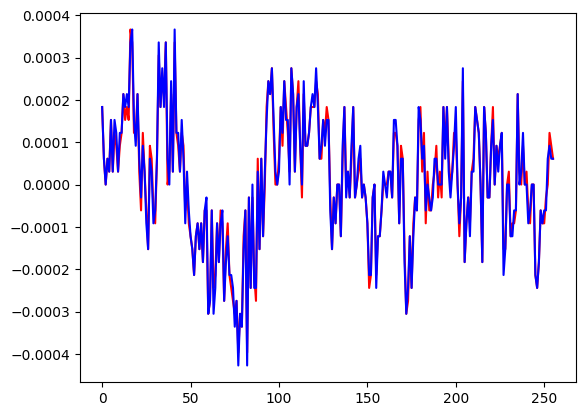

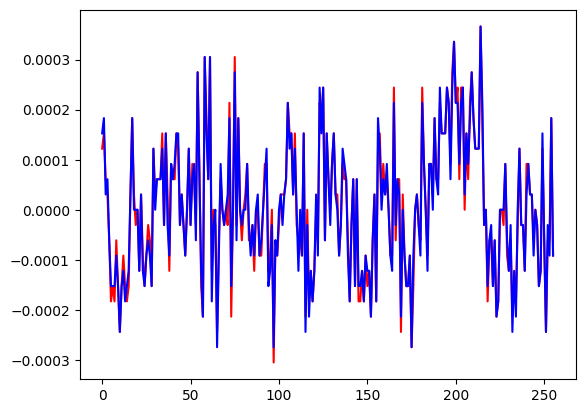

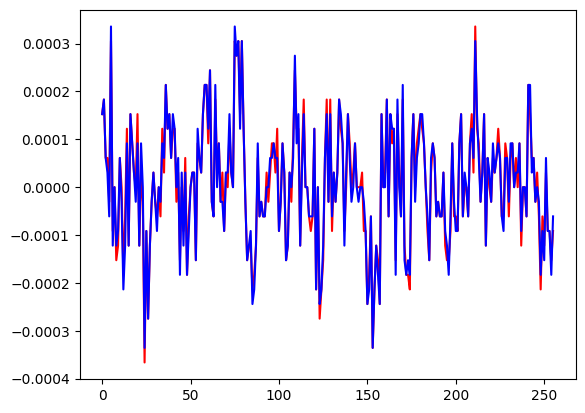

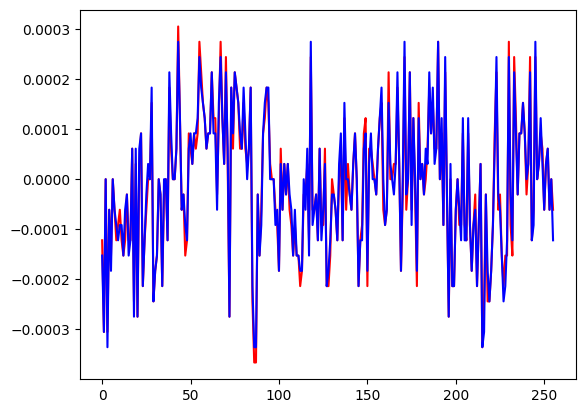

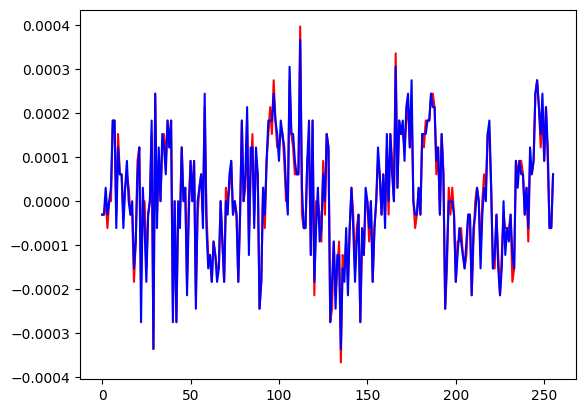

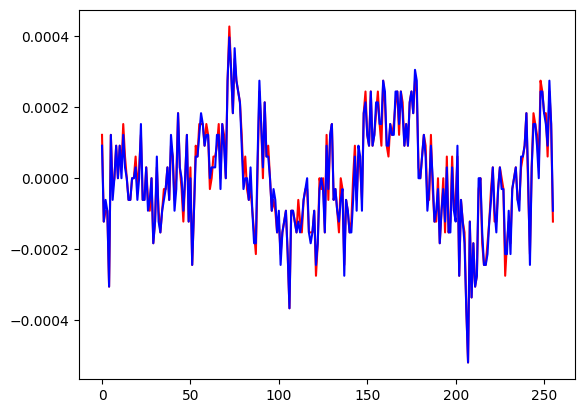

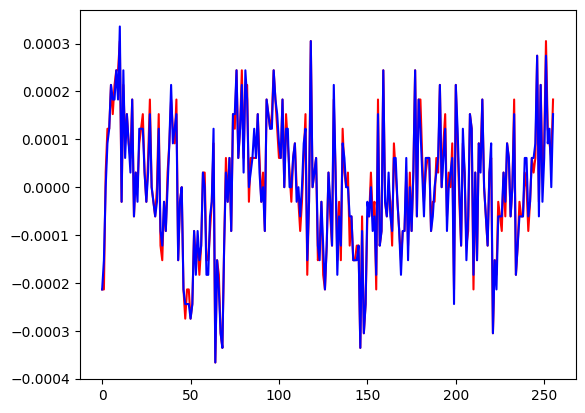

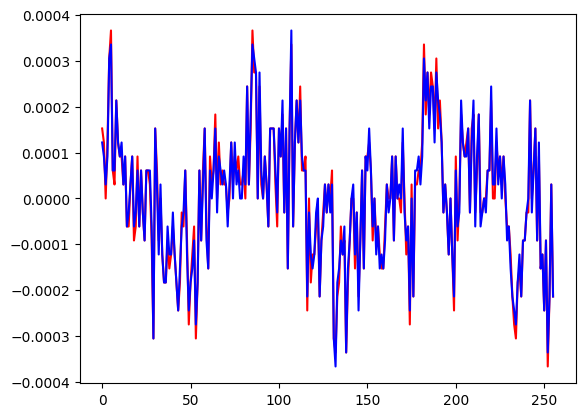

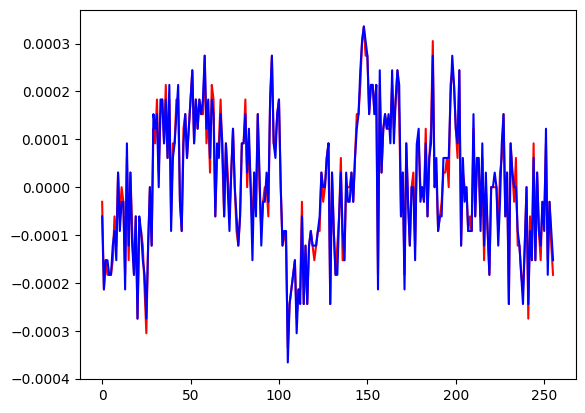

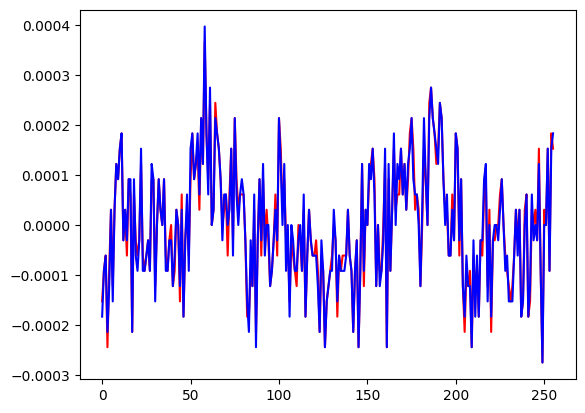

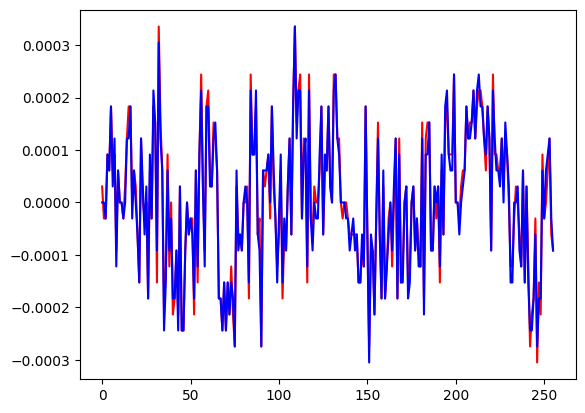

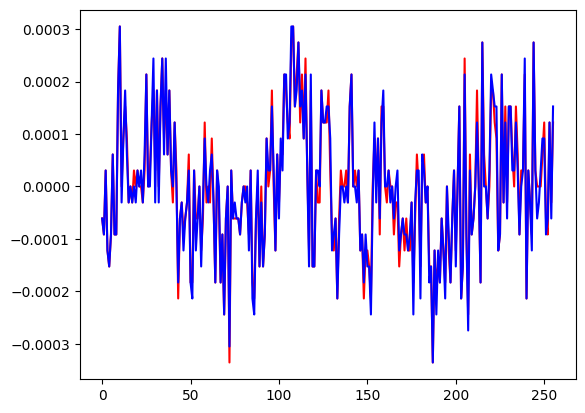

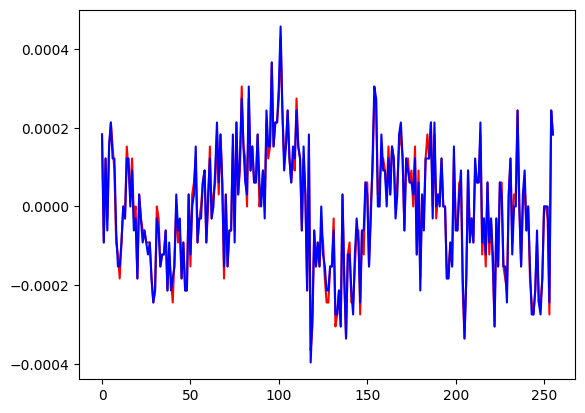

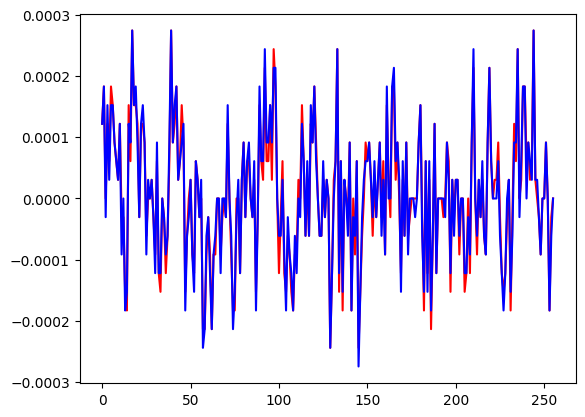

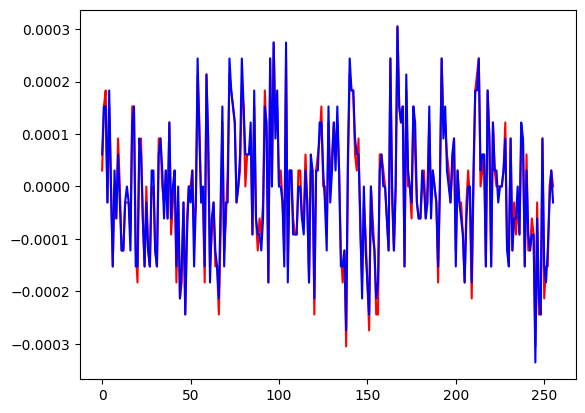

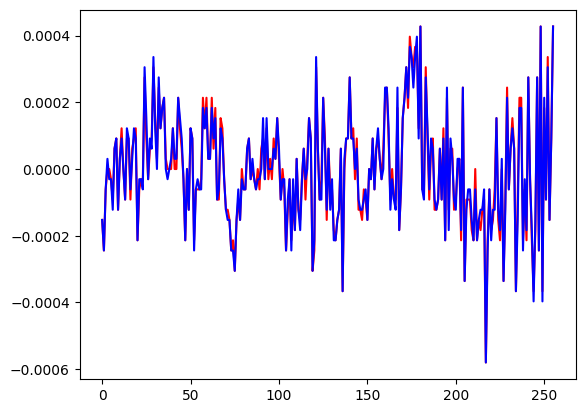

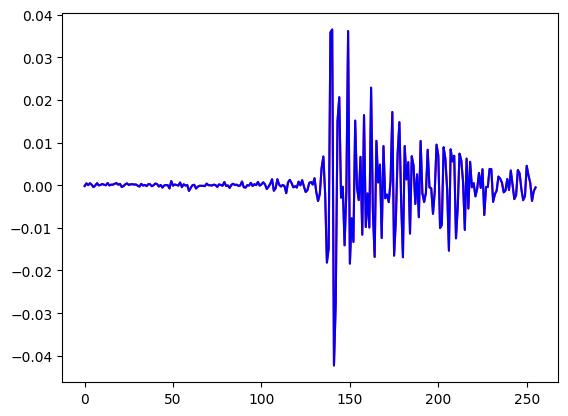

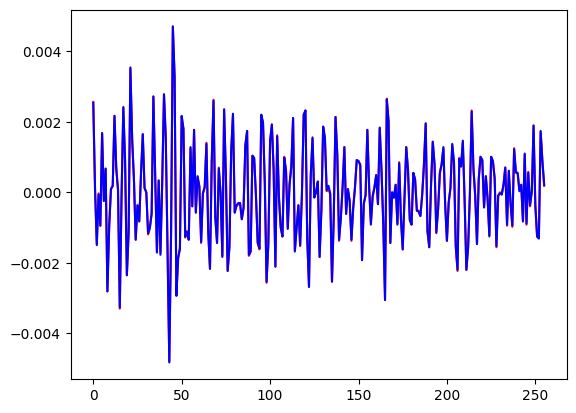

KeyboardInterrupt: 

In [47]:
import matplotlib.pyplot as plt
for i in range(len(samples_sequences)):
  l1=samples_sequences[i]
  l2=samples_sequences_clipped[i]
  xs = [x for x in range(SQNC_LENGTH)]

  plt.plot(xs, np.array(l1),color='r')
  plt.plot(xs, np.array(l2),color='b')
  plt.show()
  # Make sure to close the plt object once done
  plt.close()
  if(i==100):
    break

In [48]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from scipy.signal import stft, istft
Zxx = []
Zxx1 = []
phs = []
phs1 = []
fs = 16000
t = np.linspace(0, 1.0, SQNC_LENGTH, endpoint=False)  # Time vector
for i in range(len(samples_sequences_clipped)):
  signal = samples_sequences[i]
  signal1 = samples_sequences_clipped[i]
  print(len(signal1))
  # Parameters for STFT

  #shape of the result is (a,b) where a = frame_length//2+1 and b = ceil(N//a), N - number of samples in original sequence
  frame_length = 8  # Frame length (number of samples per frame)
  frame_step = frame_length//2  # Step between frames (overlap)

  # Compute the STFT using scipy's stft function
  f, t_stft, Z = stft(signal, fs, nperseg=frame_length, noverlap=frame_step)
  f1, t_stft1, Z1 = stft(signal1, fs, nperseg=frame_length, noverlap=frame_step)
  Zxx.append(np.abs(Z))
  Zxx1.append(np.abs(Z1))
  phs.append(tf.math.angle(Z))
  phs1.append(tf.math.angle(Z1))

256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256


In [49]:
from tensorflow.keras import layers, models
from tensorflow.keras import Model
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Normalization
import numpy as np
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
N, M = 5, 65  # Spectrogram dimensions
def scheduler(epoch, lr):
    if epoch < 50:
        return lr
    else:
        return lr * 0.95

lr_scheduler = LearningRateScheduler(scheduler)
def generate_identity_dataset(num_samples=1000):
    X = np.random.rand(num_samples, N, M)
    return X, X

def build_rnn_spectrogram_model(N, M):
    input_shape = (N, M, 1)  # Input shape for spectrograms

    input_tensor = layers.Input(shape=input_shape)
    x = layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same')(input_tensor)
    x = layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same')(x)
    x = layers.Reshape((N, M * 64))(x)
    x = layers.SimpleRNN(units=256, activation='relu', return_sequences=True)(x)
    x = layers.Dense(M, activation='linear')(x)
    x = layers.Reshape((N, M, 1))(x)


    # Add residual connection
    output_tensor = layers.Multiply()([input_tensor, x])
    model = Model(inputs=input_tensor, outputs=output_tensor)

    #model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mse'])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_absolute_error', metrics=['mae'])
    return model

from tensorflow.keras.callbacks import EarlyStopping


model = build_rnn_spectrogram_model(N, M)
model.summary()
early_stopping = EarlyStopping(monitor='loss', patience=20, restore_best_weights=True)
print(np.array(Zxx1).shape)
# Train model with normalized data
model.fit(np.array(Zxx1), np.array(Zxx) , epochs=1000, callbacks=[early_stopping])

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 5, 65, 1)       │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_6 (Conv2D)         │ (None, 5, 65, 64)      │            640 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_7 (Conv2D)         │ (None, 5, 65, 64)      │         36,928 │ conv2d_6[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape_6 (Reshape)       │ (None, 5, 4160)        │              0 │ conv2d_7[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ simple_rnn_3 (SimpleRNN)  │ (None, 5, 256)         │      1,130,752 │ reshape_6[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 5, 65)          │         16,705 │ simple_rnn_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape_7 (Reshape)       │ (None, 5, 65, 1)       │              0 │ dense_3[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multiply_3 (Multiply)     │ (None, 5, 65, 1)       │              0 │ input_layer_3[0][0],   │
│                           │                        │                │ reshape_7[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,185,025 (4.52 MB)

 Trainable params: 1,185,025 (4.52 MB)

 Non-trainable params: 0 (0.00 B)

(174, 5, 65)
Epoch 1/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 230ms/step - loss: 0.0208 - mae: 0.0208
Epoch 2/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0131 - mae: 0.0131
Epoch 3/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0064 - mae: 0.0064
Epoch 4/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0055 - mae: 0.0055
Epoch 5/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0043 - mae: 0.0043
Epoch 6/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0032 - mae: 0.0032
Epoch 7/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0032 - mae: 0.0032
Epoch 8/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0022 - mae: 0.0022
Epoch 9/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0021 - mae: 0.0021
Epoch 10/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0023 - mae: 0.0023
Epoch 11/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0021 - mae: 0.0021
Epoch 12/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0020 - mae: 0.0020
Epoch 13/1000
6/6 ━━━━━

In [8]:
model.save("clipping_interpolation_model.keras")

Or load ready weights for model from the file.

In [ ]:
from tensorflow.keras.models import load_model
model_path = "clipping_interpolation_model.keras"
model = load_model(model_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


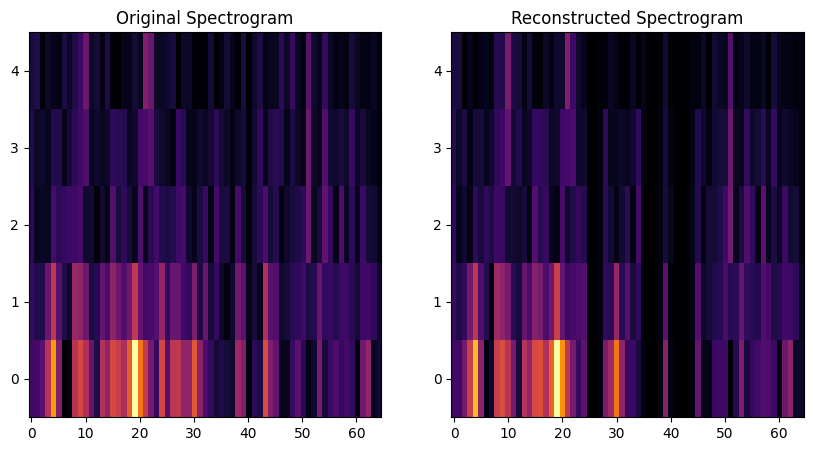

2.5904257825172658e-11
4.3192094e-09
4.15263346830646e-09
4.707521245443794e-09
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


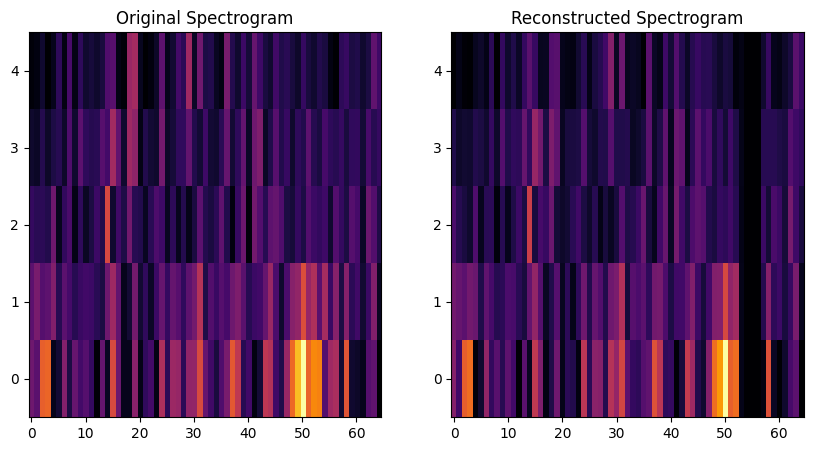

3.5198476971127375e-11
3.222431e-09
3.1388952512948612e-09
3.474494473062578e-09
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


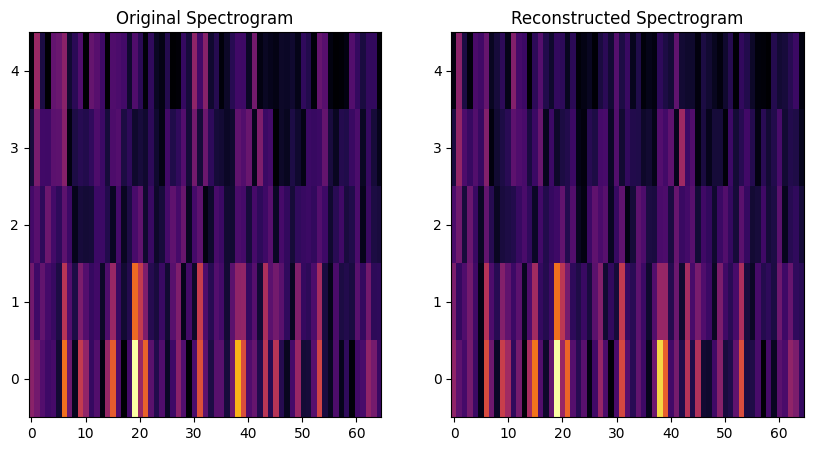

3.337764604939457e-11
3.063733e-09
3.0516682156467987e-09
3.0271413138399562e-09
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


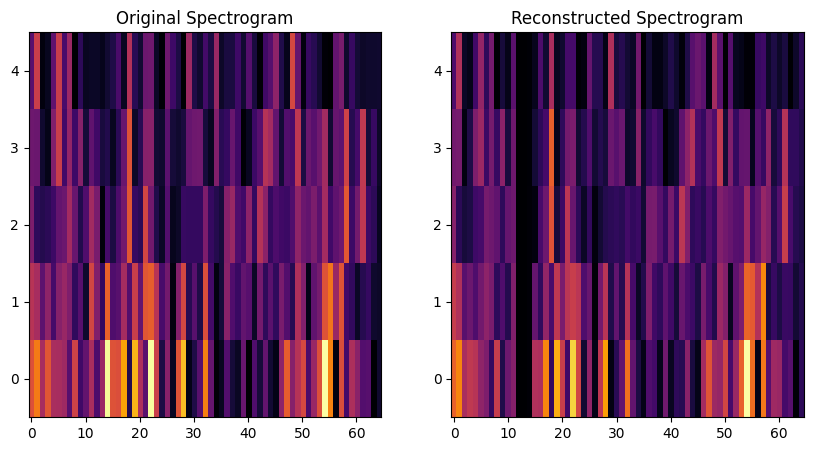

3.698672503392838e-11
3.3285963e-09
3.3438760392972038e-09
3.4703967028656606e-09
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


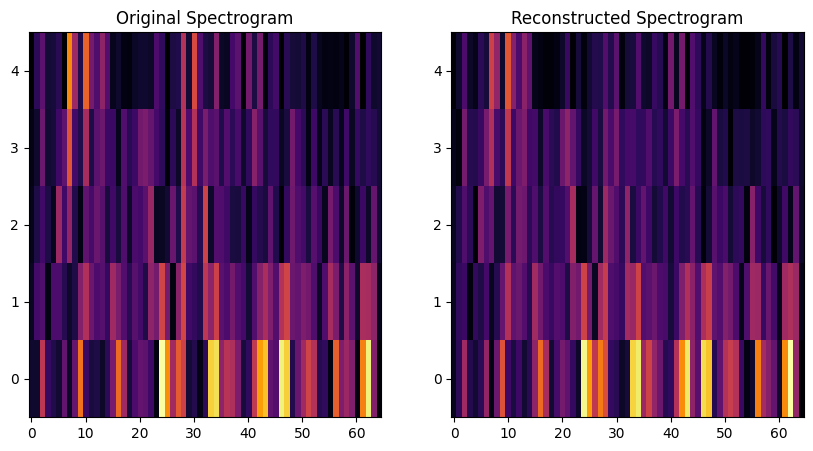

4.0598900408938985e-11
3.649747e-09
3.617212602196805e-09
3.387720095834937e-09
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


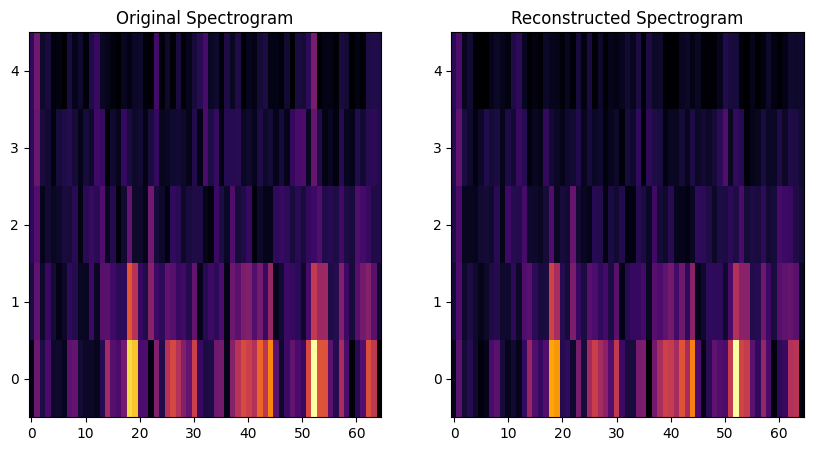

4.648559140404585e-11
5.021819e-09
4.683772655476753e-09
4.6550026613634956e-09
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


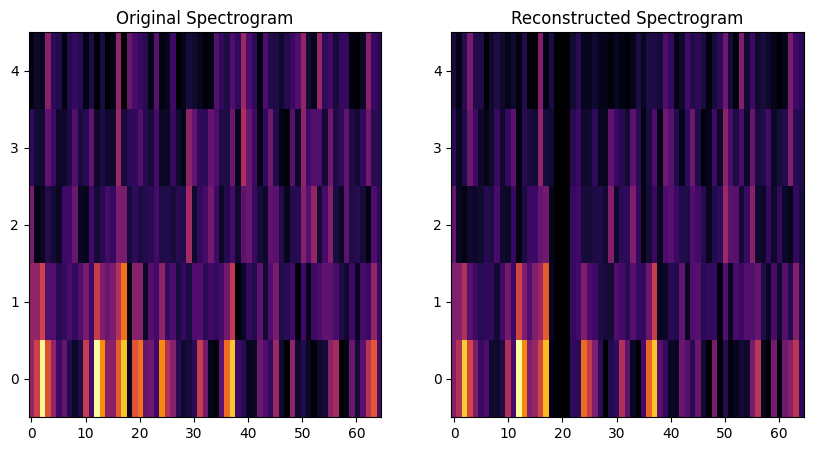

2.927791153225247e-11
3.4603325e-09
3.3760063389037297e-09
3.7114670224088353e-09
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


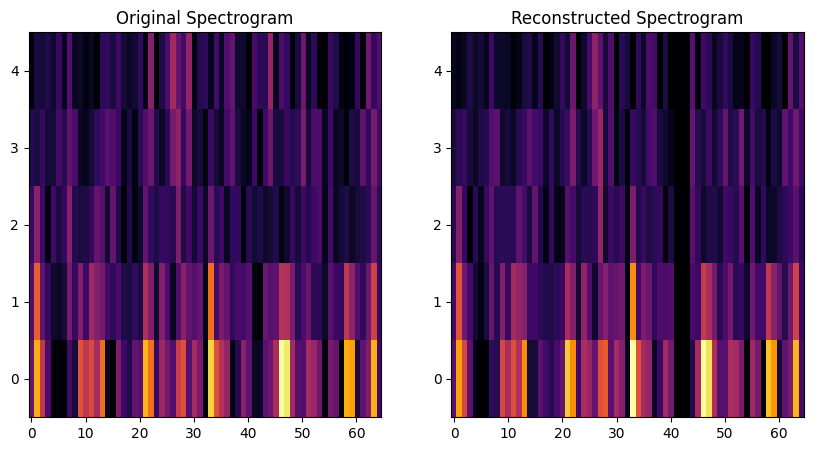

2.7485186287826054e-11
4.1392605e-09
3.977309424620925e-09
4.195193960847834e-09
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


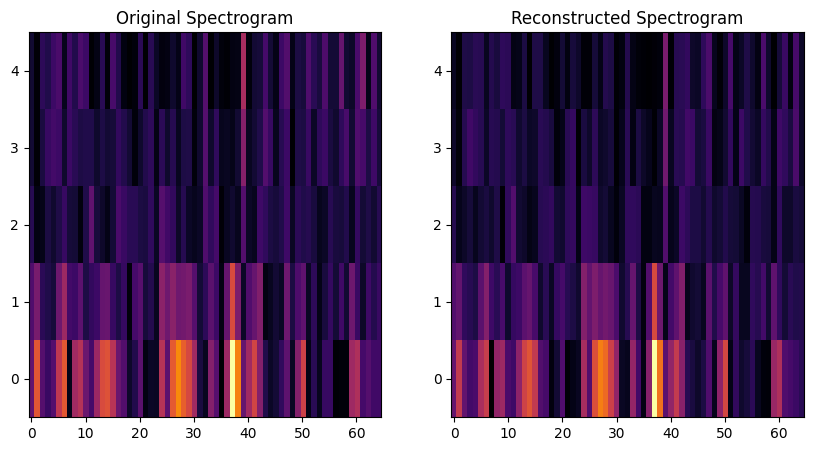

4.4529097350029285e-11
4.3293507e-09
4.1621830582558076e-09
4.0229859725356105e-09
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


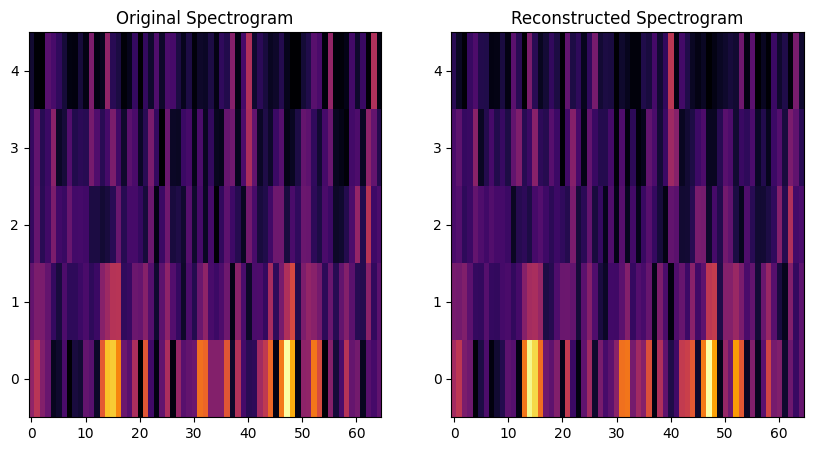

2.5545920866757352e-11
2.8929148e-09
2.8081793997912166e-09
2.694035333282263e-09


In [ ]:
import matplotlib.pyplot as plt
for i in range(10):
  reconstructed = model.predict(Zxx1[i].reshape(1,N,M))
  plt.figure(figsize=(10, 5))
  plt.subplot(1, 2, 1)
  plt.title("Original Spectrogram")
  plt.imshow(Zxx[i].squeeze(), aspect='auto', origin='lower', cmap='inferno')
  plt.subplot(1, 2, 2)
  plt.title("Reconstructed Spectrogram")
  plt.imshow(reconstructed.squeeze(), aspect='auto', origin='lower', cmap='inferno')
  plt.show()
  mse = ((reconstructed.flatten()-Zxx1[i].flatten())**2).mean(axis=0)
  mval_r =((reconstructed.flatten())**2).mean(axis=0)
  mval_t = ((Zxx1[i].flatten())**2).mean(axis=0)
  mval_o = ((Zxx[i].flatten())**2).mean(axis=0)
  print(mse)
  print(mval_r)
  print(mval_t)
  print(mval_o)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


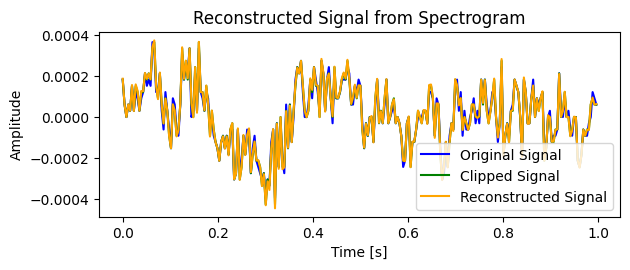

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


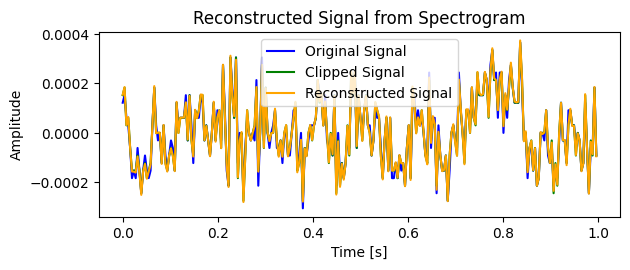

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


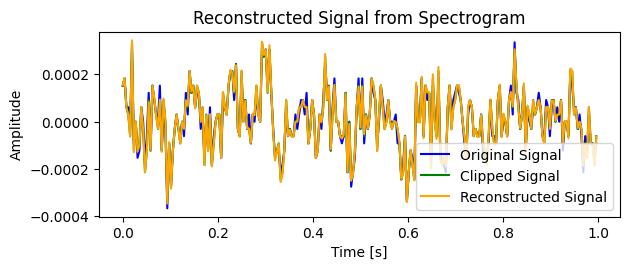

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


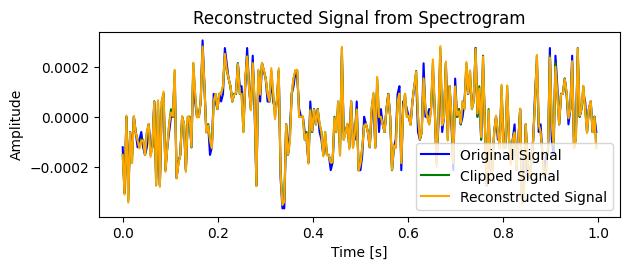

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


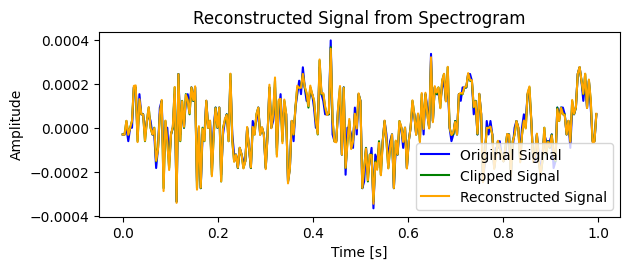

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


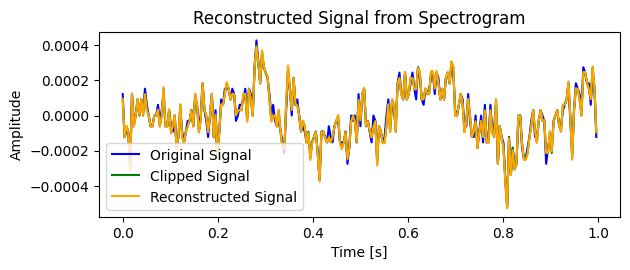

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


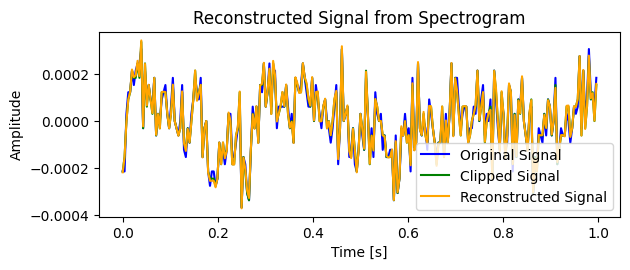

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


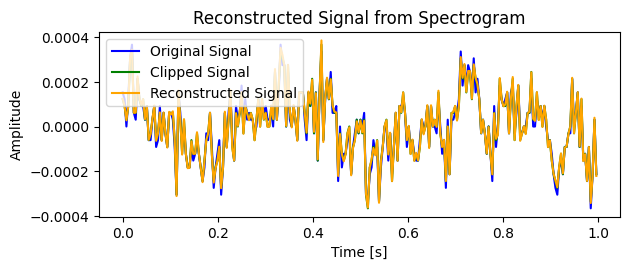

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


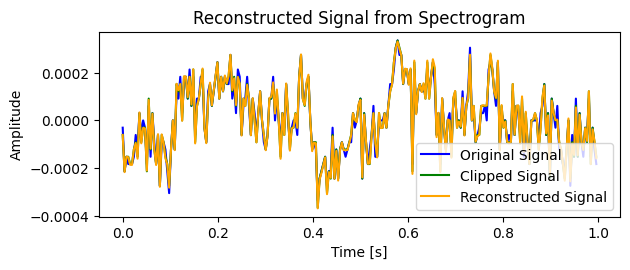

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


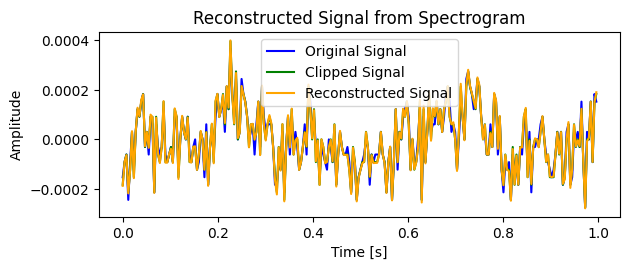

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


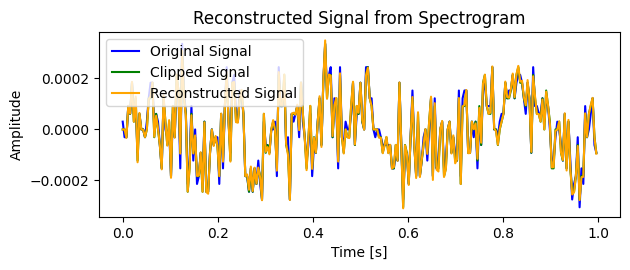

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


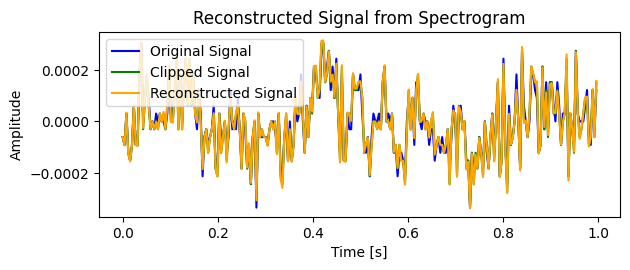

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


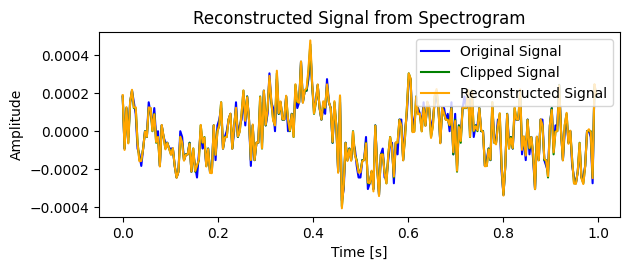

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


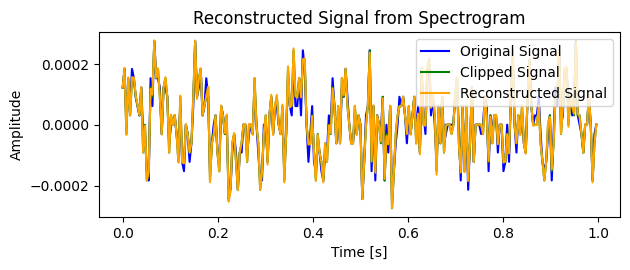

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


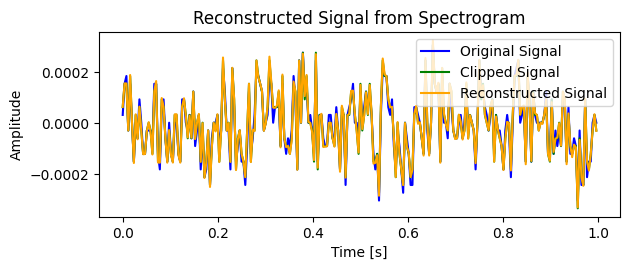

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


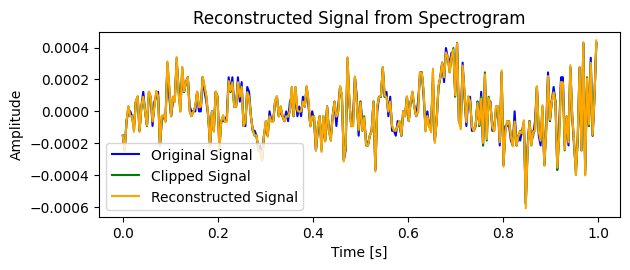

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


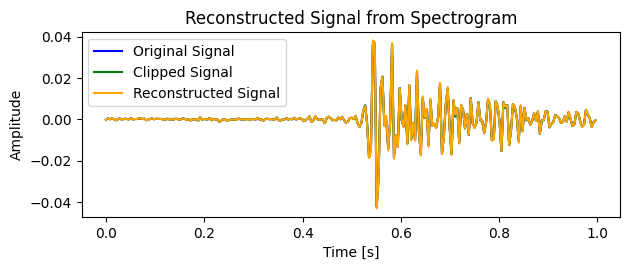

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


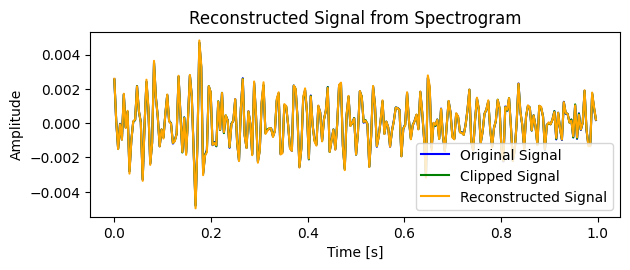

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


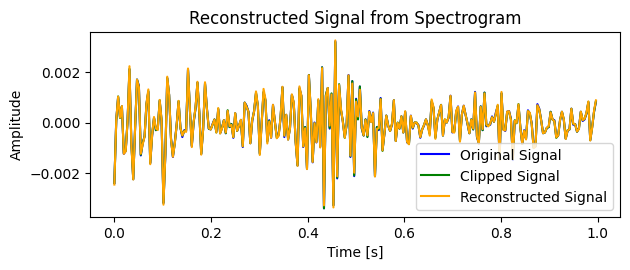

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


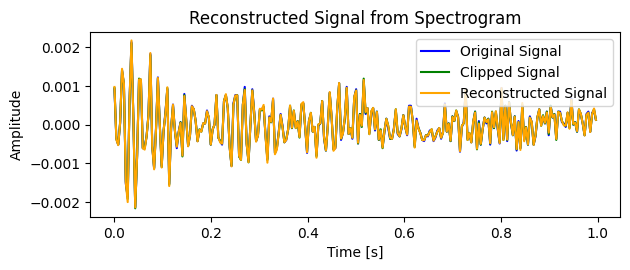

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


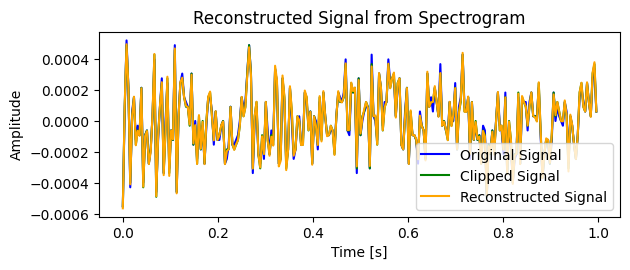

KeyboardInterrupt: 

In [40]:
import cmath
import math
for i in range(len(samples_sequences_clipped)):
  fs = 16000
  t = np.linspace(0, 1.0, SQNC_LENGTH, endpoint=False)  # Time vector
  #shape of the result is (a,b) where a = frame_length//2+1 and b = ceil(N//a), N - number of samples in original sequence
  frame_length = 8  # Frame length (number of samples per frame)
  frame_step = 4  # Step between frames (overlap)
  spgram = np.empty((N,M))
  #for j in range(N):
    #for k in range(M):
  spgram=model.predict(Zxx1[i].reshape(1,N,M)).reshape((N,M))*np.exp(1j*phs1[i].numpy())
  #print(Zxx1[10]*(math.cos(phs[10])+1j*math.sin(phs[10])))
  #print(spgram[8][2])
  _, reconstructed_signal = istft(spgram, fs, nperseg=frame_length, noverlap=frame_step)

  # Plot reconstructed signal
  plt.subplot(2, 1, 2)
  plt.plot(t, samples_sequences[i], label="Original Signal", color='blue')
  plt.plot(t, samples_sequences_clipped[i], label="Clipped Signal", color='green')
  plt.plot(t, reconstructed_signal[0:SQNC_LENGTH], label="Reconstructed Signal", color='orange')
  plt.title('Reconstructed Signal from Spectrogram')
  plt.xlabel('Time [s]')
  plt.ylabel('Amplitude')
  plt.legend()

  plt.tight_layout()
  plt.show()

In [50]:
import cmath
import math
samples_restored = []
for i in range(len(Zxx1)):
  fs = 16000
  t = np.linspace(0, 1.0, SQNC_LENGTH, endpoint=False)  # Time vector
  #shape of the result is (a,b) where a = frame_length//2+1 and b = ceil(N//a), N - number of samples in original sequence
  frame_length = 8  # Frame length (number of samples per frame)
  frame_step = 4  # Step between frames (overlap)
  spgram = np.empty((N,M))
  spgram = model.predict(Zxx1[i].reshape(1,N,M)).reshape((N,M))*np.exp(1j*phs1[i].numpy())
  _, reconstructed_signal = istft(spgram, fs, nperseg=frame_length, noverlap=frame_step)
  samples_restored.append(reconstructed_signal[0:SQNC_LENGTH])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


In [42]:
print(len(samples1) % SQNC_LENGTH)
print(len(samples1[len(samples1)-(len(samples1) % SQNC_LENGTH)::]))

38
38


In [52]:
#print(np.array(samples_restored).flatten().shape)
samples_restored_final = np.append(np.array(samples_restored).flatten(),np.array(samples1[len(samples1)-(len(samples1) % SQNC_LENGTH)::]))
import wave
import numpy as np

def write_float_samples_to_wav(samples, sample_rate, output_path):
    """
    Writes floating-point audio samples to a mono 16-bit WAV file.

    Parameters:
        samples (list or np.ndarray): Array of floating-point audio samples in the range [-1.0, 1.0].
        sample_rate (int): Sample rate of the audio in Hz (e.g., 44100).
        output_path (str): Path to save the output WAV file.
    """
    # Ensure the samples are a NumPy array
    samples = np.array(samples, dtype=np.float32)

    # Clip the samples to the range [-1.0, 1.0] to prevent overflow
    samples = np.clip(samples, -1.0, 1.0)

    # Convert to 16-bit PCM format
    int_samples = (samples * 32767).astype(np.int16)

    # Write to a WAV file
    with wave.open(output_path, 'wb') as wav_file:
        # Set the parameters for the WAV file
        wav_file.setnchannels(1)  # Mono
        wav_file.setsampwidth(2)  # 16-bit PCM
        wav_file.setframerate(sample_rate)

        # Write the audio frames
        wav_file.writeframes(int_samples.tobytes())

sample_rate = 16000  # 44.1 kHz
output_path = 'output.wav'  # Path to save the WAV file

write_float_samples_to_wav(samples_restored_final, sample_rate, output_path)
print(f"WAV file written to {output_path}")


WAV file written to output.wav


Restoring my file with trained NN. Allows to do training and using separately.

In [16]:
file_path2 = '1c_16khz.wav'

def write_float_samples_to_wav(samples, sample_rate, output_path):
    """
    Writes floating-point audio samples to a mono 16-bit WAV file.

    Parameters:
        samples (list or np.ndarray): Array of floating-point audio samples in the range [-1.0, 1.0].
        sample_rate (int): Sample rate of the audio in Hz (e.g., 44100).
        output_path (str): Path to save the output WAV file.
    """
    # Ensure the samples are a NumPy array
    samples = np.array(samples, dtype=np.float32)

    # Clip the samples to the range [-1.0, 1.0] to prevent overflow
    samples = np.clip(samples, -1.0, 1.0)

    # Convert to 16-bit PCM format
    int_samples = (samples * 32767).astype(np.int16)

    # Write to a WAV file
    with wave.open(output_path, 'wb') as wav_file:
        # Set the parameters for the WAV file
        wav_file.setnchannels(1)  # Mono
        wav_file.setsampwidth(2)  # 16-bit PCM
        wav_file.setframerate(sample_rate)

        # Write the audio frames
        wav_file.writeframes(int_samples.tobytes())

from scipy.io import wavfile

# Read the WAV file
sample_rate_input, _ = wavfile.read(file_path2)
print(f"Sample rate: {sample_rate_input} Hz")
input_samples = read_wav_as_float(file_path2)
j = 0
SQNC_LENGTH = 256
input_sequences = []
while j < len(input_samples):
    if(j+SQNC_LENGTH < len(input_samples)):
        input_sequences.append(input_samples[j:j+SQNC_LENGTH])
    j += SQNC_LENGTH
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from scipy.signal import stft, istft
Zxx2 = []
phs2 = []
t = np.linspace(0, 1.0, SQNC_LENGTH, endpoint=False)  # Time vector
for i in range(len(input_sequences)):
  #signal = samples_sequences[i]
  input_signal = input_sequences[i]
  print(len(input_signal))
  # Parameters for STFT

  #shape of the result is (a,b) where a = frame_length//2+1 and b = ceil(N//a), N - number of samples in original sequence
  frame_length = 8  # Frame length (number of samples per frame)
  frame_step = frame_length//2  # Step between frames (overlap)

  # Compute the STFT using scipy's stft function
  f2, t_stft2, Z2 = stft(input_signal, sample_rate_input, nperseg=frame_length, noverlap=frame_step)
  Zxx2.append(np.abs(Z2))
  phs2.append(tf.math.angle(Z2))
import cmath
import math
my_samples_restored = []
for i in range(len(Zxx2)):
  t = np.linspace(0, 1.0, SQNC_LENGTH, endpoint=False)  # Time vector
  #shape of the result is (a,b) where a = frame_length//2+1 and b = ceil(N//a), N - number of samples in original sequence
  frame_length = 8  # Frame length (number of samples per frame)
  frame_step = 4  # Step between frames (overlap)
  input_spgram = np.empty((N,M))
  input_spgram = model.predict(Zxx2[i].reshape(1,N,M)).reshape((N,M))*np.exp(1j*phs2[i].numpy())
  _, reconstructed_input_signal = istft(input_spgram, sample_rate_input, nperseg=frame_length, noverlap=frame_step)
  my_samples_restored.append(reconstructed_input_signal[0:SQNC_LENGTH])

my_samples_restored = np.array(my_samples_restored).flatten()
output_path = 'output.wav'  # Path to save the WAV file

write_float_samples_to_wav(my_samples_restored, sample_rate_input, output_path)
print(f"WAV file written to {output_path}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
WAV file written to output.wav


In [ ]:
from scipy.io import wavfile

# Read the WAV file
sample_rate, _ = wavfile.read('1c.wav')
print(f"Sample rate: {sample_rate} Hz")


Sample rate: 44100 Hz


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras import Model
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Normalization,SimpleRNN,Dense,LSTM,Dropout,GRU
from tensorflow.keras.models import Sequential
import numpy as np
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import EarlyStopping
def build_and_train_model(X_train,y_train,callbacks_=None):
        model = Sequential()
        model.add(SimpleRNN(256, return_sequences=True,
                  input_shape=(X_train.shape[1],1)))
        model.add(SimpleRNN(256, return_sequences=True))
        model.add(SimpleRNN(256, return_sequences=True))
        model.add(Dense(units=1))  # The time step of the output

        model.compile(optimizer='rmsprop', loss='mean_squared_error')
        model.summary()
        if(callbacks_!=None):
          model.fit(X_train, y_train, epochs=500, batch_size=200, verbose=1, callbacks=[callbacks_])
        else:
          model.fit(X_train, y_train, epochs=500, batch_size=200, verbose=1)
        return model
        '''model = Sequential()
        model.add(LSTM(units=64, return_sequences=True,
                  input_shape=(X_train.shape[1], 1)))
        model.add(Dropout(0.2))
        model.add(LSTM(units=64, return_sequences=True))
        model.add(Dropout(0.2))
        model.add(LSTM(units=64))
        model.add(Dropout(0.2))
        model.add(Dense(units=SQNC_LENGTH))

        opt = tf.keras.optimizers.Adam(learning_rate=0.001)
        model.compile(optimizer=opt, loss='mean_squared_error',metrics=['accuracy'])
        model.fit(X_train, y_train, epochs=20, batch_size=128)'''
        '''model = Sequential()
        # First GRU layer with Dropout regularisation
        model.add(GRU(units=32, return_sequences=True, input_shape=(
        X_train.shape[1], 1), activation='tanh'))
        model.add(Dropout(0.2))
        # Second GRU layer
        model.add(GRU(units=32, return_sequences=True, activation='tanh'))
        model.add(Dropout(0.2))

        # Third GRU layer
        model.add(GRU(units=32, return_sequences=True, activation='tanh'))
        model.add(Dropout(0.2))
        # Fourth GRU layer
        model.add(GRU(units=32, activation='tanh'))
        model.add(Dropout(0.2))
        # The output layer
        model.add(Dense(units=256))
        # Compiling the RNN
        model.compile(optimizer=SGD(learning_rate=0.01, decay=1e-7,
                      momentum=0.6, nesterov=False), loss='mean_squared_error')
        model.fit(X_train, y_train, epochs=100, batch_size=128)
        return model'''
print(len(samples_sequences_clipped[0]))

256


In [13]:
early_stopping = EarlyStopping(monitor='loss', patience=20, restore_best_weights=True)
mdl = build_and_train_model(np.array(samples_sequences_clipped),np.array(samples_sequences),early_stopping)
print(np.array(samples).shape)
#mdl = build_and_train_model(np.array(samples).reshape((1,len(samples))),np.array(samples1).reshape(1,len(samples1)))

NameError: name 'build_and_train_model' is not defined

In [12]:
import cmath
import math
import matplotlib.pyplot as plt
output_result = []
for i in range(len(samples_sequences_clipped)):
  fs = 16000
  t = np.linspace(0, 1.0, SQNC_LENGTH, endpoint=False)  # Time vector
  print("i=",i)
  print(np.array(samples_sequences_clipped[i]).shape)
  reconstructed_signal = model.predict(np.array(samples_sequences_clipped[i]).reshape(1,SQNC_LENGTH,1)).reshape((SQNC_LENGTH))
  output_result.append(reconstructed_signal)
  #print(reconstructed_signal.shape)
  # Plot reconstructed signal
  '''plt.subplot(2, 1, 2)
  plt.plot(t, reconstructed_signal, label="Reconstructed Signal", color='orange')
  plt.plot(t, samples_sequences[i], label="Original Signal", color='blue')
  plt.plot(t, samples_sequences_clipped[i], label="Clipped Signal", color='green')
  plt.title('Reconstructed Signal from Spectrogram')
  plt.xlabel('Time [s]')
  plt.ylabel('Amplitude')
  plt.legend()

  plt.tight_layout()
  plt.show()'''

i= 0
(256,)


InvalidArgumentError: Graph execution error:

Detected at node functional_1/reshape_1/Reshape defined at (most recent call last):
<stack traces unavailable>
Input to reshape is a tensor with 16384 values, but the requested shape has 20800

Stack trace for op definition: 
File "<frozen runpy>", line 198, in _run_module_as_main
File "<frozen runpy>", line 88, in _run_code
File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 619, in start
File "/usr/local/lib/python3.11/dist-packages/tornado/platform/asyncio.py", line 205, in start
File "/usr/lib/python3.11/asyncio/base_events.py", line 608, in run_forever
File "/usr/lib/python3.11/asyncio/base_events.py", line 1936, in _run_once
File "/usr/lib/python3.11/asyncio/events.py", line 84, in _run
File "/usr/local/lib/python3.11/dist-packages/tornado/ioloop.py", line 699, in <lambda>
File "/usr/local/lib/python3.11/dist-packages/tornado/ioloop.py", line 750, in _run_callback
File "/usr/local/lib/python3.11/dist-packages/tornado/gen.py", line 824, in inner
File "/usr/local/lib/python3.11/dist-packages/tornado/gen.py", line 785, in run
File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 361, in process_one
File "/usr/local/lib/python3.11/dist-packages/tornado/gen.py", line 233, in wrapper
File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell
File "/usr/local/lib/python3.11/dist-packages/tornado/gen.py", line 233, in wrapper
File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request
File "/usr/local/lib/python3.11/dist-packages/tornado/gen.py", line 233, in wrapper
File "/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute
File "/usr/local/lib/python3.11/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell
File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell
File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell
File "/usr/local/lib/python3.11/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner
File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async
File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes
File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
File "<ipython-input-12-4afe7d1e228d>", line 10, in <cell line: 0>
File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 562, in predict
File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 259, in one_step_on_data_distributed
File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 249, in one_step_on_data
File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 104, in predict_step
File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
File "/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py", line 908, in __call__
File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
File "/usr/local/lib/python3.11/dist-packages/keras/src/ops/operation.py", line 46, in __call__
File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler
File "/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py", line 182, in call
File "/usr/local/lib/python3.11/dist-packages/keras/src/ops/function.py", line 171, in _run_through_graph
File "/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py", line 637, in call
File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
File "/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py", line 908, in __call__
File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
File "/usr/local/lib/python3.11/dist-packages/keras/src/ops/operation.py", line 46, in __call__
File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler
File "/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/reshape.py", line 66, in call
File "/usr/local/lib/python3.11/dist-packages/keras/src/ops/numpy.py", line 4868, in reshape
File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/numpy.py", line 1915, in reshape

	 [[{{node functional_1/reshape_1/Reshape}}]]
	tf2xla conversion failed while converting __inference_one_step_on_data_25772[]. Run with TF_DUMP_GRAPH_PREFIX=/path/to/dump/dir and --vmodule=xla_compiler=2 to obtain a dump of the compiled functions.
	 [[StatefulPartitionedCall]] [Op:__inference_one_step_on_data_distributed_25793]

In [ ]:
print(np.array(samples_sequences_clipped[5]).reshape(1,256,1))
print(mdl.predict(np.array(samples_sequences_clipped[5]).reshape(1,256,1)))

[[[ 9.15527344e-05]
  [-1.22070312e-04]
  [-6.10351562e-05]
  [-9.15527344e-05]
  [-3.05175781e-04]
  [ 1.22070312e-04]
  [-6.10351562e-05]
  [ 0.00000000e+00]
  [ 9.15527344e-05]
  [ 0.00000000e+00]
  [ 9.15527344e-05]
  [ 0.00000000e+00]
  [ 1.22070312e-04]
  [ 3.05175781e-05]
  [ 0.00000000e+00]
  [-6.10351562e-05]
  [-6.10351562e-05]
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.05175781e-05]
  [-6.10351562e-05]
  [ 0.00000000e+00]
  [ 1.52587891e-04]
  [-6.10351562e-05]
  [-6.10351562e-05]
  [ 3.05175781e-05]
  [-9.15527344e-05]
  [-6.10351562e-05]
  [ 0.00000000e+00]
  [-1.83105469e-04]
  [-1.22070312e-04]
  [ 6.10351562e-05]
  [-1.22070312e-04]
  [-1.52587891e-04]
  [-9.15527344e-05]
  [-6.10351562e-05]
  [-3.05175781e-05]
  [ 3.05175781e-05]
  [-6.10351562e-05]
  [ 1.22070312e-04]
  [ 6.10351562e-05]
  [-9.15527344e-05]
  [-3.05175781e-05]
  [ 1.83105469e-04]
  [ 3.05175781e-05]
  [ 0.00000000e+00]
  [-9.15527344e-05]
  [ 0.00000000e+00]
  [ 1.22070312e-04]
  [-1.22070312e-04]


In [ ]:
def flatten(xss):
    return [x for xs in xss for x in xs]
print(len(flatten(output_result)))

44544


In [ ]:
write_float_samples_to_wav(flatten(output_result),16000,"mynewoutp.wav")